In [97]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

In [51]:
df_import_package_full = pd.read_csv("../data/full_import_dataset/full_import_dataset_with_package.csv")
df_import_package_full.head()

,project_name,import,is_kotlin_import,is_python_import,package
0,2dust#v2rayNG,androidx.appcompat.app.AppCompatActivity,1,0,androidx.appcompat.app
1,InsertKoinIO#koin,androidx.appcompat.app.AppCompatActivity,1,0,androidx.appcompat.app
2,InsertKoinIO#koin,androidx.appcompat.app.AppCompatActivity,1,0,androidx.appcompat.app
3,InsertKoinIO#koin,androidx.appcompat.app.AppCompatActivity,1,0,androidx.appcompat.app
4,InsertKoinIO#koin,androidx.appcompat.app.AppCompatActivity,1,0,androidx.appcompat.app


In [53]:
# Count diff imports of packages in projects
df_package = df_import_package_full \
    .groupby(['project_name', 'package']) \
    .agg({'import':'count', 'is_kotlin_import':'first', 'is_python_import':'first'}) \
    .reset_index() \
    .rename(columns={'import':'count_different_import', 
                     'is_kotlin_import':'is_kotlin_package', 
                     'is_python_import':'is_python_package'})

df_package.head()

,project_name,package,count_different_import,is_kotlin_package,is_python_package
0,01joy#news-search-engine,bs4,1,0,1
1,01joy#news-search-engine,datetime,2,0,1
2,01joy#news-search-engine,flask.Flask,1,0,1
3,01joy#news-search-engine,flask.render_template,1,0,1
4,01joy#news-search-engine,flask.request,1,0,1


In [58]:
def map_project(df: pd.Series) -> pd.Series:
    tag = 'package'
    lang = 'kotlin' if df['is_kotlin_package'] == 1 else 'python'
    package = df['package']
    df['package'] = f'{tag}#{lang}#{package}'
    return df

In [59]:
df_package = df_package.apply(map_project, axis=1)

## Package features extraction

In [61]:
pivot_package = df_package \
    .pivot_table(index="project_name", columns="package", values="count_different_import", fill_value=0)

pivot_package.head()

package,package#kotlin#B,package#kotlin#C,package#kotlin#Class,package#kotlin#Host,package#kotlin#LibPackCase1,package#kotlin#LibPackCase2,package#kotlin#Libraries,package#kotlin#Library,package#kotlin#My,package#kotlin#POGOProtos,...,package#python#zeroconf,package#python#zigpy,package#python#zipfile,package#python#zipimport,package#python#zlib,package#python#zmq,package#python#zope,package#python#zulint,package#python#zulip_bots,package#python#zwave_js_server
project_name,,,,,,,,,,,,,,,,,,,,,
01joy#news-search-engine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
05bit#peewee-async,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0k#shyaml,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0x00-0x00#ShellPop,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0xAX#linux-insides,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
pivot_package.shape

(2836, 3982)

### TF-IDF transformation for packages

In [63]:
def tf_idf(t):
    N = pivot_package.shape[0]
    idf = np.log(N / pivot_package[pivot_package[t] > 0].shape[0])
    tf = pivot_package[t] / pivot_package['packages_count']
    return tf * idf

In [66]:
packages = df_package['package'].unique()
pivot_package['packages_count'] = pivot_package[packages].sum(axis=1)

for t in packages:
    pivot_package[t] = tf_idf(t)
    
pivot_package.head()

package,package#kotlin#B,package#kotlin#C,package#kotlin#Class,package#kotlin#Host,package#kotlin#LibPackCase1,package#kotlin#LibPackCase2,package#kotlin#Libraries,package#kotlin#Library,package#kotlin#My,package#kotlin#POGOProtos,...,package#python#zigpy,package#python#zipfile,package#python#zipimport,package#python#zlib,package#python#zmq,package#python#zope,package#python#zulint,package#python#zulip_bots,package#python#zwave_js_server,packages_count
project_name,,,,,,,,,,,,,,,,,,,,,
01joy#news-search-engine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
05bit#peewee-async,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
0k#shyaml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
0x00-0x00#ShellPop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14
0xAX#linux-insides,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


## Extension features extraction

In [67]:
# Load ext count dataset
df_extension = pd.read_csv("../data/ext_count/full_ext_count_dataset.csv", index_col=0)
df_extension = df_extension.dropna()
df_extension.head()

,project_name,ext,count
0,donnemartin#gitsome,.yml,4
2,donnemartin#gitsome,.md,10
3,donnemartin#gitsome,.py,345
4,donnemartin#gitsome,.txt,3
5,donnemartin#gitsome,.ini,1


In [68]:
df_extension.shape

(75348, 3)

In [69]:
def map_extension(df: pd.Series) -> pd.Series:
    tag = 'ext'
    ext = df['ext'][1:]
    df['ext'] = f'{tag}#{ext}'
    return df

In [70]:
df_extension = df_extension.apply(map_extension, axis=1)
df_extension.head()

,project_name,ext,count
0,donnemartin#gitsome,ext#yml,4
2,donnemartin#gitsome,ext#md,10
3,donnemartin#gitsome,ext#py,345
4,donnemartin#gitsome,ext#txt,3
5,donnemartin#gitsome,ext#ini,1


In [71]:
pivot_extension = df_extension.pivot_table(index="project_name", columns="ext", values="count", fill_value=0)
pivot_extension.head()

ext,ext#,ext#0,ext#0+,ext#0-AT,ext#0-Combined-Work-Exception,ext#0-DE,ext#0-FR,ext#0-IGO,ext#0-NL,ext#0-Perl,...,ext#zktx,ext#zlib,ext#zmpl,ext#zone,ext#zoneinfo,ext#zpln,ext#zraw,ext#zsh,ext#zst,ext#zzz
project_name,,,,,,,,,,,,,,,,,,,,,
01joy#news-search-engine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
05bit#peewee-async,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0k#shyaml,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0x00-0x00#ShellPop,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0xAX#linux-insides,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
pivot_extension.shape

(3404, 3852)

In [109]:
def tf(t):
    tf = pivot_extension[t] / (pivot_extension['ext_count'] + 1)
    return tf

In [110]:
extensions = df_extension['ext'].unique()
pivot_extension['ext_count'] = pivot_extension[extensions].sum(axis=1)

for t in extensions:
    pivot_extension[t] = tf(t)
    
pivot_extension.head()

ext,ext#,ext#0,ext#0+,ext#0-AT,ext#0-Combined-Work-Exception,ext#0-DE,ext#0-FR,ext#0-IGO,ext#0-NL,ext#0-Perl,...,ext#zlib,ext#zmpl,ext#zone,ext#zoneinfo,ext#zpln,ext#zraw,ext#zsh,ext#zst,ext#zzz,ext_count
project_name,,,,,,,,,,,,,,,,,,,,,
01joy#news-search-engine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2492.0
05bit#peewee-async,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
0k#shyaml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
0x00-0x00#ShellPop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0
0xAX#linux-insides,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0


## Kaggle dataset

In [74]:
# Load kaggle_repos dataframe
df_kaggle = pd.read_csv("../data/kaggle_repos/kaggle_repos.csv")
df_kaggle.head()

,topic,name,owner,owner_type,full_name,description,og_image,license,is_archived,is_forked,...,open_issues,forks,stars,watchers,has_wiki,has_pages,has_sponsorship,created_at,updated_at,repo
0,3d,SpaceshipGenerator,a1studmuffin,User,a1studmuffin/SpaceshipGenerator,A Blender script to procedurally generate 3D s...,NaN,Other,False,False,...,13,391,7100,7100,True,False,False,2016-06-14T03:16:07Z,2022-04-06T16:55:48Z,https://github.com/a1studmuffin/SpaceshipGener...
1,3d,BlenderGIS,domlysz,User,domlysz/BlenderGIS,NaN,NaN,GNU General Public License v3.0,False,False,...,155,923,5047,5047,True,False,False,2014-05-08T14:48:25Z,2022-04-08T00:59:56Z,https://github.com/domlysz/BlenderGIS
2,3d,PRNet,YadiraF,User,YadiraF/PRNet,Joint 3D Face Reconstruction and Dense Alignme...,NaN,MIT License,False,False,...,160,919,4574,4574,True,False,False,2018-03-20T11:44:06Z,2022-04-08T03:00:19Z,https://github.com/YadiraF/PRNet
3,3d,3DDFA,cleardusk,User,cleardusk/3DDFA,The PyTorch improved version of TPAMI 2017 pap...,NaN,MIT License,False,False,...,51,621,3223,3223,False,False,False,2018-06-29T14:19:21Z,2022-04-07T07:47:09Z,https://github.com/cleardusk/3DDFA
4,3d,armory,armory3d,Organization,armory3d/armory,NaN,NaN,zlib License,False,False,...,310,263,2421,2421,True,False,False,2015-10-29T18:27:56Z,2022-04-06T21:17:40Z,https://github.com/armory3d/armory


In [75]:
df_kaggle.columns

Index(['topic', 'name', 'owner', 'owner_type', 'full_name', 'description',
       'og_image', 'license', 'is_archived', 'is_forked', 'size', 'language',
       'tags', 'open_issues', 'forks', 'stars', 'watchers', 'has_wiki',
       'has_pages', 'has_sponsorship', 'created_at', 'updated_at', 'repo'],
      dtype='object')

In [77]:
# Prepare column for join
df_kaggle["project_name"] = df_kaggle["owner"] + "#" + df_kaggle["name"]
df_kaggle["project_name"].head()

0    a1studmuffin#SpaceshipGenerator
1                 domlysz#BlenderGIS
2                      YadiraF#PRNet
3                    cleardusk#3DDFA
4                    armory3d#armory
Name: project_name, dtype: object

## Repos tags extraction

In [78]:
df_kaggle_tags = df_kaggle[["project_name", "tags"]]
df_kaggle_tags.head()

,project_name,tags
0,a1studmuffin#SpaceshipGenerator,"['python', 'procedural-generation', 'blender-s..."
1,domlysz#BlenderGIS,[]
2,YadiraF#PRNet,"['swap', 'face', 'alignment', 'reconstruction'..."
3,cleardusk#3DDFA,"['python', 'computer-vision', 'deep-learning',..."
4,armory3d#armory,[]


In [79]:
df_kaggle_tags["tags"] = df_kaggle_tags["tags"].apply(ast.literal_eval)
df_kaggle_tags.head()

/usr/local/lib/python3.9/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,project_name,tags
0,a1studmuffin#SpaceshipGenerator,"[python, procedural-generation, blender-script..."
1,domlysz#BlenderGIS,[]
2,YadiraF#PRNet,"[swap, face, alignment, reconstruction, 3d]"
3,cleardusk#3DDFA,"[python, computer-vision, deep-learning, pytor..."
4,armory3d#armory,[]


In [80]:
# Prepare dataset for pivot
df_kaggle_tags = df_kaggle_tags.explode("tags")
df_kaggle_tags.head()

,project_name,tags
0,a1studmuffin#SpaceshipGenerator,python
0,a1studmuffin#SpaceshipGenerator,procedural-generation
0,a1studmuffin#SpaceshipGenerator,blender-scripts
0,a1studmuffin#SpaceshipGenerator,game-development
0,a1studmuffin#SpaceshipGenerator,3d


In [81]:
df_kaggle_tags["val"] = 1
df_kaggle_tags.head()

,project_name,tags,val
0,a1studmuffin#SpaceshipGenerator,python,1
0,a1studmuffin#SpaceshipGenerator,procedural-generation,1
0,a1studmuffin#SpaceshipGenerator,blender-scripts,1
0,a1studmuffin#SpaceshipGenerator,game-development,1
0,a1studmuffin#SpaceshipGenerator,3d,1


In [82]:
# Rename each tag name to avoid name collision with package names
df_kaggle_tags['tags'] = df_kaggle_tags['tags'].apply(lambda x: f"tag#{x}")
df_kaggle_tags.head()

,project_name,tags,val
0,a1studmuffin#SpaceshipGenerator,tag#python,1
0,a1studmuffin#SpaceshipGenerator,tag#procedural-generation,1
0,a1studmuffin#SpaceshipGenerator,tag#blender-scripts,1
0,a1studmuffin#SpaceshipGenerator,tag#game-development,1
0,a1studmuffin#SpaceshipGenerator,tag#3d,1


In [83]:
# Total number of tags
df_kaggle_tags['tags'].unique().size

9148

In [84]:
pivot_tags = df_kaggle_tags.pivot_table(index="project_name", values="val", columns="tags", fill_value=0)
pivot_tags.head()

tags,tag#010editor,tag#053,tag#0day,tag#100daysofcode,tag#104,tag#1111,tag#12306,tag#163mail-login,tag#2,tag#2019-ncov,...,tag#zircon,tag#zookeeper,tag#zoom,tag#zotero,tag#zotero-api,tag#zsh,tag#ztp,tag#zuul,tag#zvt,tag#zypper
project_name,,,,,,,,,,,,,,,,,,,,,
01joy#news-search-engine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
05bit#peewee-async,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0k#shyaml,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0x00-0x00#ShellPop,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0xAX#linux-insides,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Repos topics extraction

In [98]:
df_kaggle_topics = df_kaggle[["project_name", "topic"]]
df_kaggle_topics.head()

,project_name,topic
0,a1studmuffin#SpaceshipGenerator,3d
1,domlysz#BlenderGIS,3d
2,YadiraF#PRNet,3d
3,cleardusk#3DDFA,3d
4,armory3d#armory,3d


In [99]:
df_kaggle_topics["val"] = 1
df_kaggle_topics.head()

/var/folders/4s/hl9y6lqs3h1c9qxxnbjmtvsr0000gn/T/ipykernel_33330/317438842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kaggle_topics["val"] = 1


,project_name,topic,val
0,a1studmuffin#SpaceshipGenerator,3d,1
1,domlysz#BlenderGIS,3d,1
2,YadiraF#PRNet,3d,1
3,cleardusk#3DDFA,3d,1
4,armory3d#armory,3d,1


In [100]:
df_kaggle_topics["topic"] = df_kaggle_topics["topic"].apply(lambda x: f"topic#{x}")
df_kaggle_topics.head()

/var/folders/4s/hl9y6lqs3h1c9qxxnbjmtvsr0000gn/T/ipykernel_33330/1886053688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kaggle_topics["topic"] = df_kaggle_topics["topic"].apply(lambda x: f"topic#{x}")


,project_name,topic,val
0,a1studmuffin#SpaceshipGenerator,topic#3d,1
1,domlysz#BlenderGIS,topic#3d,1
2,YadiraF#PRNet,topic#3d,1
3,cleardusk#3DDFA,topic#3d,1
4,armory3d#armory,topic#3d,1


In [101]:
pivot_topics = df_kaggle_topics.pivot_table(index="project_name", values="val", columns="topic", fill_value=0)
pivot_topics.head()

topic,topic#3d,topic#ajax,topic#algorithm,topic#android,topic#angular,topic#ansible,topic#api,topic#arduino,topic#aspnet,topic#atom,...,topic#vim,topic#virtual-reality,topic#vue,topic#wagtail,topic#web-components,topic#webapp,topic#webpack,topic#windows,topic#wordpress,topic#xml
project_name,,,,,,,,,,,,,,,,,,,,,
01joy#news-search-engine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
05bit#peewee-async,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0k#shyaml,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0x00-0x00#ShellPop,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0xAX#linux-insides,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Final dataset construction

In [102]:
# Final step - join package columns (features) and tags columns (targets)

In [111]:
# First of all check size of dataframes
print('package:', pivot_package.shape)
print('ext:', pivot_extension.shape)
print('tag:', pivot_tags.shape)
print('topic:', pivot_topics.shape)

package: (2836, 3983)
ext: (3404, 3853)
tag: (3418, 9148)
topic: (3418, 161)


In [112]:
final_dataset = pivot_package.join(pivot_extension, on="project_name", how="inner")
final_dataset = final_dataset.join(pivot_tags, on="project_name", how="inner")
final_dataset = final_dataset.join(pivot_topics, on="project_name", how="inner")
final_dataset.head()

,package#kotlin#B,package#kotlin#C,package#kotlin#Class,package#kotlin#Host,package#kotlin#LibPackCase1,package#kotlin#LibPackCase2,package#kotlin#Libraries,package#kotlin#Library,package#kotlin#My,package#kotlin#POGOProtos,...,topic#vim,topic#virtual-reality,topic#vue,topic#wagtail,topic#web-components,topic#webapp,topic#webpack,topic#windows,topic#wordpress,topic#xml
project_name,,,,,,,,,,,,,,,,,,,,,
01joy#news-search-engine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
05bit#peewee-async,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
0k#shyaml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
0x00-0x00#ShellPop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
0xAX#linux-insides,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
final_dataset.reset_index(inplace=True)

In [114]:
final_dataset.head()

,project_name,package#kotlin#B,package#kotlin#C,package#kotlin#Class,package#kotlin#Host,package#kotlin#LibPackCase1,package#kotlin#LibPackCase2,package#kotlin#Libraries,package#kotlin#Library,package#kotlin#My,...,topic#vim,topic#virtual-reality,topic#vue,topic#wagtail,topic#web-components,topic#webapp,topic#webpack,topic#windows,topic#wordpress,topic#xml
0,01joy#news-search-engine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,05bit#peewee-async,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0k#shyaml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0x00-0x00#ShellPop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0xAX#linux-insides,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# Final dataset postprocessing

# Filtering tags

In [115]:
old_tags = [c for c in final_dataset.columns if c.startswith('tag#')]
len(old_tags)

9148

In [116]:
tags_dataset = final_dataset[old_tags]
tags_dataset.head()

,tag#010editor,tag#053,tag#0day,tag#100daysofcode,tag#104,tag#1111,tag#12306,tag#163mail-login,tag#2,tag#2019-ncov,...,tag#zircon,tag#zookeeper,tag#zoom,tag#zotero,tag#zotero-api,tag#zsh,tag#ztp,tag#zuul,tag#zvt,tag#zypper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
def build_count_tags_usage_dataset(tags_data):
    return tags_data.apply(lambda x: x.sum()).reset_index().rename(columns={0:"count"})

In [118]:
count_tags_usage_dataset = build_count_tags_usage_dataset(tags_dataset)
count_tags_usage_dataset.head()

,index,count
0,tag#010editor,0
1,tag#053,1
2,tag#0day,1
3,tag#100daysofcode,1
4,tag#104,1


There are many zeros - need to filter it

In [119]:
count_tags_usage_dataset.sort_values(by=["count"])

,index,count
0,tag#010editor,0
6870,tag#role,0
6880,tag#rotation,0
6888,tag#routing-algorithm,0
6897,tag#rplace,0
...,...,...
1999,tag#deep-learning,203
2212,tag#django,237
4662,tag#machine-learning,257
5254,tag#nan,412


In [120]:
count_tags_usage_dataset[count_tags_usage_dataset["count"] == 0].shape

(1125, 2)

In [121]:
tags_dataset = tags_dataset[count_tags_usage_dataset[count_tags_usage_dataset["count"] != 0]["index"]]
tags_dataset.shape

(2836, 8023)

In [122]:
count_tags_usage_dataset = build_count_tags_usage_dataset(tags_dataset)
count_tags_usage_dataset.head()

,index,count
0,tag#053,1
1,tag#0day,1
2,tag#100daysofcode,1
3,tag#104,1
4,tag#1111,1


In [123]:
# there is nan tag - should be filtered
count_tags_usage_dataset = count_tags_usage_dataset.sort_values(by=["count"],ascending=False)
count_tags_usage_dataset.head()

,index,count
5608,tag#python,1085
4622,tag#nan,412
4097,tag#machine-learning,257
1916,tag#django,237
1732,tag#deep-learning,203


In [124]:
tags_dataset = tags_dataset[count_tags_usage_dataset[count_tags_usage_dataset["index"] != "tag#nan"]['index']]
tags_dataset.head()

,tag#python,tag#machine-learning,tag#django,tag#deep-learning,tag#tensorflow,tag#python3,tag#flask,tag#kotlin,tag#android,tag#hacktoberfest,...,tag#han,tag#hamradio-application,tag#hamradio,tag#hamming-distance,tag#hail,tag#hacs,tag#hacks,tag#hackintosh,tag#hackerrank,tag#zypper
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
count_tags_usage_dataset = build_count_tags_usage_dataset(tags_dataset)
count_tags_usage_dataset.head()

,index,count
0,tag#python,1085
1,tag#machine-learning,257
2,tag#django,237
3,tag#deep-learning,203
4,tag#tensorflow,174


In [126]:
# check value counts
value_counts = count_tags_usage_dataset["count"].value_counts()
value_counts

1       5793
2       1033
3        375
4        213
5        131
        ... 
145        1
257        1
1085       1
38         1
203        1
Name: count, Length: 67, dtype: int64

<AxesSubplot:>

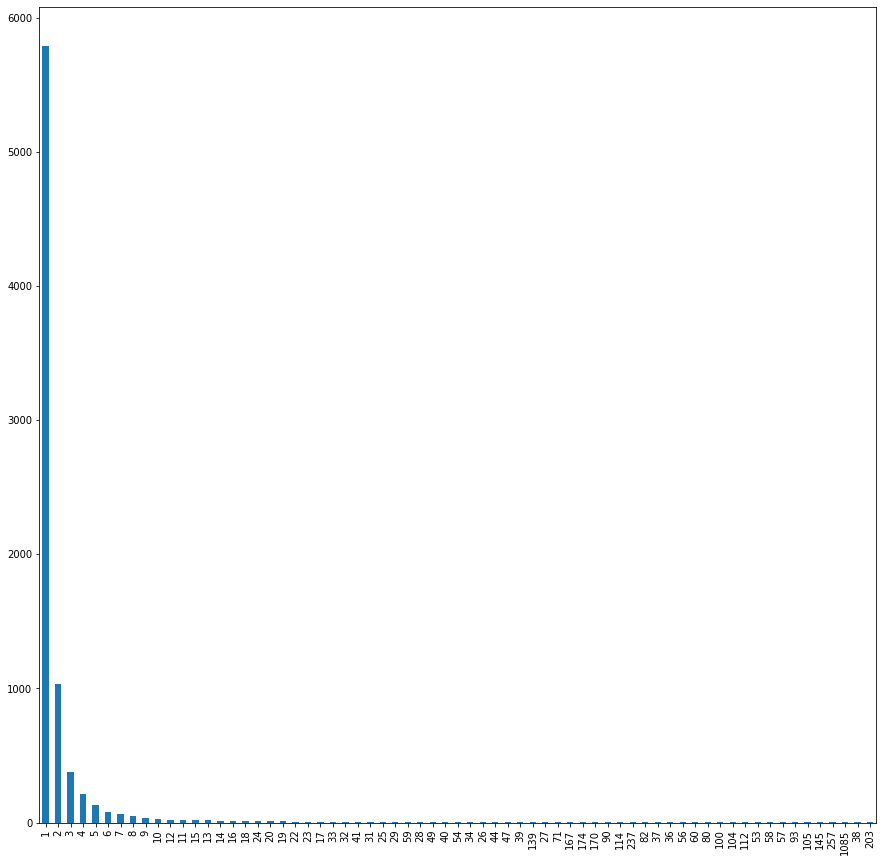

In [127]:
# take a look on bar chart of value counts
value_counts.plot.bar(figsize=(15,15))

In [128]:
# try to filter tags which count less than 5
count_tags_usage_dataset = build_count_tags_usage_dataset(tags_dataset)
count_tags_usage_dataset.head()

,index,count
0,tag#python,1085
1,tag#machine-learning,257
2,tag#django,237
3,tag#deep-learning,203
4,tag#tensorflow,174


In [129]:
tags_dataset = tags_dataset[count_tags_usage_dataset[count_tags_usage_dataset["count"] >= 5]['index']]
tags_dataset.head()

,tag#python,tag#machine-learning,tag#django,tag#deep-learning,tag#tensorflow,tag#python3,tag#flask,tag#kotlin,tag#android,tag#hacktoberfest,...,tag#smart-contracts,tag#flow,tag#architecture,tag#home-automation,tag#learning,tag#cloud-native,tag#telegram-userbot,tag#python-script,tag#rxjava,tag#ecommerce
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
count_tags_usage_dataset = build_count_tags_usage_dataset(tags_dataset)
count_tags_usage_dataset.head()

,index,count
0,tag#python,1085
1,tag#machine-learning,257
2,tag#django,237
3,tag#deep-learning,203
4,tag#tensorflow,174


<AxesSubplot:>

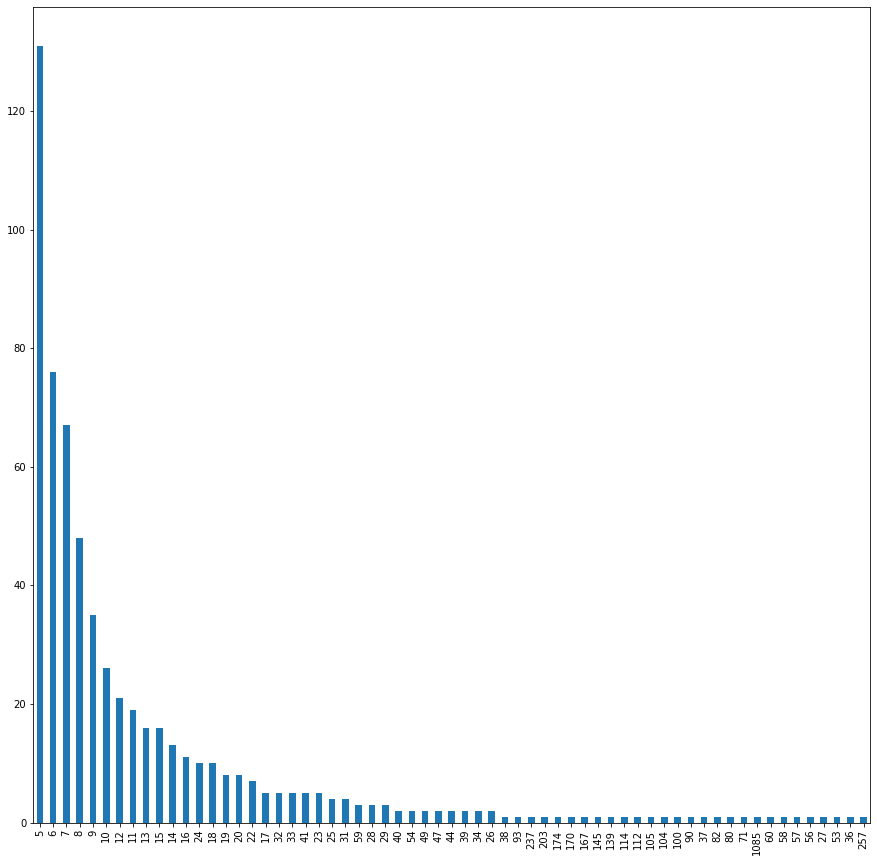

In [131]:
# check bar chart of value counts again
count_tags_usage_dataset["count"].value_counts().plot.bar(figsize=(15,15))

In [132]:
# I like count 10, lets filter tags with count less than 10
tags_dataset = tags_dataset[count_tags_usage_dataset[count_tags_usage_dataset["count"] >= 10]['index']]
tags_dataset.head()

,tag#python,tag#machine-learning,tag#django,tag#deep-learning,tag#tensorflow,tag#python3,tag#flask,tag#kotlin,tag#android,tag#hacktoberfest,...,tag#code-review,tag#wechat,tag#oauth2,tag#plotly,tag#matplotlib,tag#word2vec,tag#ipython,tag#pyrogram,tag#pretrained-models,tag#nginx
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
# Lets check the rest of tags - looks good to me
tags_dataset.columns.tolist()

['tag#python',
 'tag#machine-learning',
 'tag#django',
 'tag#deep-learning',
 'tag#tensorflow',
 'tag#python3',
 'tag#flask',
 'tag#kotlin',
 'tag#android',
 'tag#hacktoberfest',
 'tag#bot',
 'tag#scikit-learn',
 'tag#nlp',
 'tag#pytorch',
 'tag#docker',
 'tag#telegram',
 'tag#linux',
 'tag#data-science',
 'tag#security',
 'tag#cryptocurrency',
 'tag#gradle',
 'tag#cli',
 'tag#api',
 'tag#java',
 'tag#keras',
 'tag#natural-language-processing',
 'tag#computer-vision',
 'tag#google',
 'tag#jupyter-notebook',
 'tag#bitcoin',
 'tag#aws',
 'tag#javascript',
 'tag#library',
 'tag#testing',
 'tag#ansible',
 'tag#algorithm',
 'tag#github-api',
 'tag#data-visualization',
 'tag#wagtail',
 'tag#covid-19',
 'tag#neural-network',
 'tag#windows',
 'tag#json',
 'tag#git',
 'tag#telegram-bot',
 'tag#twitter',
 'tag#terminal',
 'tag#pandas',
 'tag#ubuntu',
 'tag#web',
 'tag#automation',
 'tag#jupyter',
 'tag#framework',
 'tag#rest-api',
 'tag#parsing',
 'tag#artificial-intelligence',
 'tag#ethereum',


In [134]:
new_tags = tags_dataset.columns

In [135]:
# generate new columns of final dataset
new_final_dataset_columns = [c for c in final_dataset.columns if not c.startswith('tag#') or c in new_tags]

In [136]:
final_dataset.shape

(2836, 17146)

In [137]:
final_dataset = final_dataset[new_final_dataset_columns]

In [138]:
# new shape
final_dataset.shape

(2836, 8249)

In [139]:
final_dataset.head()

,project_name,package#kotlin#B,package#kotlin#C,package#kotlin#Class,package#kotlin#Host,package#kotlin#LibPackCase1,package#kotlin#LibPackCase2,package#kotlin#Libraries,package#kotlin#Library,package#kotlin#My,...,topic#vim,topic#virtual-reality,topic#vue,topic#wagtail,topic#web-components,topic#webapp,topic#webpack,topic#windows,topic#wordpress,topic#xml
0,01joy#news-search-engine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,05bit#peewee-async,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0k#shyaml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0x00-0x00#ShellPop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0xAX#linux-insides,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# Filter projects which hasn't any tag form our new tag set

In [140]:
# Count such unlucky projects
final_dataset[new_tags].sum(1).value_counts()

3     567
2     545
0     438
4     388
1     311
5     264
6     148
7      66
8      44
9      27
10     24
12      5
13      5
11      3
14      1
dtype: int64

In [141]:
# So we have 439 projects without any tag from our new tag set
# And we have two options:
# First - leave it untouched and fit classifier on full negative projects too
# Second - filter it
# So hard choice :)

In [142]:
# Lets leave it as it is for now

# Export final dataset

In [143]:
final_dataset.head()

,project_name,package#kotlin#B,package#kotlin#C,package#kotlin#Class,package#kotlin#Host,package#kotlin#LibPackCase1,package#kotlin#LibPackCase2,package#kotlin#Libraries,package#kotlin#Library,package#kotlin#My,...,topic#vim,topic#virtual-reality,topic#vue,topic#wagtail,topic#web-components,topic#webapp,topic#webpack,topic#windows,topic#wordpress,topic#xml
0,01joy#news-search-engine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,05bit#peewee-async,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0k#shyaml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0x00-0x00#ShellPop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0xAX#linux-insides,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
final_dataset.shape

(2836, 8249)

In [145]:
final_dataset.to_csv("../data/classification/count_dataset_for_multilabel.csv", index=False)

In [146]:
final_columns = final_dataset.columns.to_frame(index=False, name="column_name")

In [147]:
final_columns.head()

,column_name
0,project_name
1,package#kotlin#B
2,package#kotlin#C
3,package#kotlin#Class
4,package#kotlin#Host


In [148]:
final_columns.to_csv("../data/pipeline/final_columns.csv", index=False)